# Training Linear Models

1. Linear Regression
 + The Normal Equation (the first way to train linear regression model)
 + Computational Complexity
2. Gradient Descent (the second way)
 + Batch Gradient Descent
 + Stochastic Gradient Descent
 + Mini-batch Gradient Descent
3. Polynomial Regression (can fit non-linear datasets)
4. Learning Curves (detect whether or not overfitting)
5. Regularized Linear Models (reduce the risk of overfitting the training set)
 + Ridge Regression
 + Lasso Regression
 + Elastic Regression
 + Early Stopping
6. Logistic Regression (commonly used for classification)
 + Estimating Probabilities
 + Training and Cost Function
 + Decision Boundaries
 + Softmax Regression

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
%matplotlib inline

## 1 Linear Regression

More generally, a <font color='red'>linear model</font> makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias term** (also called the **intercept term**).

Equation 1: Linear Regression model prediction
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

Equation 2: Linear Regression model prediction (vectorized form)
$$\hat{y} = h_{\theta}(\bf x)= {\theta}^T \cdot {\bf x}$$

### 1.1 The Normal Equation

Equation 3: Normal Equation
$$\hat{\theta} = ({\bf X}^T \cdot {\bf X})^{-1} \cdot {\bf X}^T \cdot y$$

Generate some linear-looking data:

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100, 1)

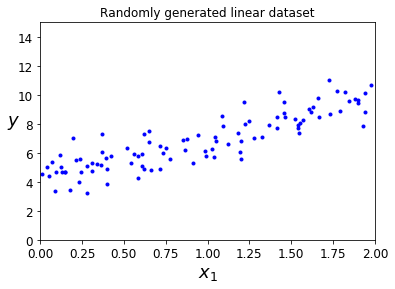

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0, 2, 0, 15])
plt.title("Randomly generated linear dataset")
plt.show()

In [6]:
# Add x0=1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

Make predictions using $\hat{\theta}$:

In [7]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [8]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Plot this model's predicitons:

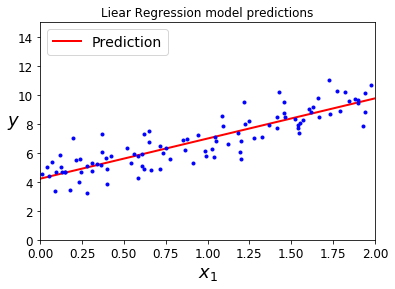

In [9]:
plt.plot(X_new, y_predict, "r-", label="Prediction", linewidth=2)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Liear Regression model predictions")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lin_reg.coef_

array([[2.77011339]])

In [12]:
lin_reg.intercept_

array([4.21509616])

In [13]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 2 Gradient Descent

GD is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems.

The general idea of GD is to tweak params interatively in order to minimize a cost func.

### Batch Gradient Descent

Batch GD uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [17]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - gradients * eta
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 10])
    plt.title("$eta$ = {}".format(eta), fontsize=10)

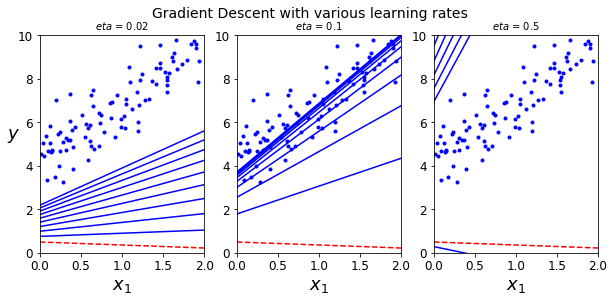

In [18]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.suptitle("Gradient Descent with various learning rates", fontsize=14)
plt.show()

In [19]:
len(theta_path_bgd)

1000

### Stochastic GD

Stochastic GD just picks a random instance in the training set at very step and computes the gradients based only on that single instance, which makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

SGD is much less regular than batch GD.

The following codes implemets SGD using a simple learning schedule:

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)  # random initialization
m = len(X)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [21]:
theta

array([[4.20725458],
       [2.7418767 ]])

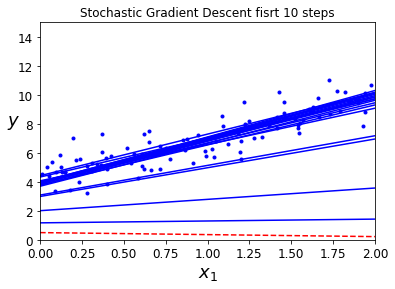

In [22]:
np.random.seed(42)
theta_path_sgd = []
theta = np.random.randn(2, 1)  # random initialization
m = len(X_b)


for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0, 2, 0, 15])
plt.title("Stochastic Gradient Descent fisrt 10 steps")
plt.show()

In [23]:
len(theta_path_sgd)

5000

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, random_state=42, eta0=0.01)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
sgd_reg.intercept_

array([3.95074114])

In [26]:
sgd_reg.coef_

array([3.00355264])

### Mini-batch Gradient Descent

Mini-batch GD computes the gradient on small random sets of instances called **mini-batches**.

In [27]:
theta_path_mgd = []

i_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [28]:
theta

array([[4.20887719],
       [2.76284597]])

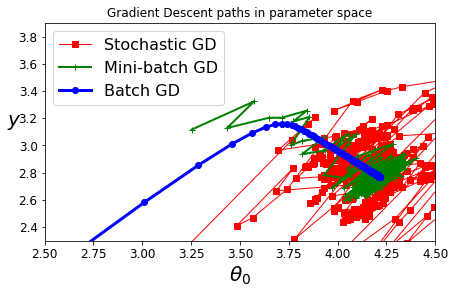

In [29]:
theta_path_sgd = np.array(theta_path_sgd)
theta_path_bgd = np.array(theta_path_bgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],
         "r-s", linewidth=1, label="Stochastic GD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1],
         "g-+", linewidth=2, label="Mini-batch GD")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1],
         "b-o", linewidth=3, label="Batch GD")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.title("Gradient Descent paths in parameter space")
plt.show()

## 3 Polynomial Regression

**fit nonlinear dataset**

A simple way to do this is to add powers (幂) of each feature as new features, then train a linear modle on this extended set of featurses. This technique is called **Polynomial Regression**.

Generate some nonlinear data:

In [30]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

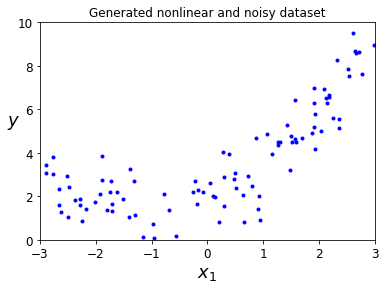

In [31]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3, 3, 0, 10])
plt.title("Generated nonlinear and noisy dataset")
plt.show()

Use `PolynomialFeatures` class to transform oure training data, adding the square ($2^{nd}$-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:5]

array([[-1.31267663e+00,  1.72311993e+00],
       [-7.78056651e-02,  6.05372153e-03],
       [-7.74476522e-01,  5.99813884e-01],
       [-2.76736030e+00,  7.65828305e+00],
       [ 6.57140619e-01,  4.31833793e-01]])

In [33]:
# The total number of input features
poly_features.n_input_features_

1

In [34]:
# The total number of polynomial output features
poly_features.n_output_features_

2

In [35]:
# powers_[i, j] is the exponent of the jth input in the ith output
poly_features.powers_

array([[1],
       [2]], dtype=int64)

In [36]:
# Return feature names for output features
poly_features.get_feature_names()

['x0', 'x0^2']

Add a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [37]:
poly_features_2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly_2 = poly_features_2.fit_transform(X)
X_poly_2[:5]

array([[ 1.00000000e+00, -1.31267663e+00,  1.72311993e+00],
       [ 1.00000000e+00, -7.78056651e-02,  6.05372153e-03],
       [ 1.00000000e+00, -7.74476522e-01,  5.99813884e-01],
       [ 1.00000000e+00, -2.76736030e+00,  7.65828305e+00],
       [ 1.00000000e+00,  6.57140619e-01,  4.31833793e-01]])

In [38]:
# Return feature names for output features
poly_features_2.get_feature_names()

['1', 'x0', 'x0^2']

`X_poly` contains the original feature of X plus the square of this feature.

Fit a `LinearRegression` model to this extended training data:

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
lin_reg.intercept_, lin_reg.coef_

(array([1.84666539]), array([[1.06344249, 0.50906508]]))

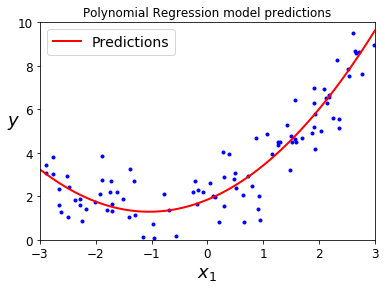

In [41]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left", fontsize=14)
plt.title("Polynomial Regression model predictions")
plt.show()

the model estimates $\hat y =0.5015459 {x_1}^2+1.04630034x_1+1.99958228$

the original function is $y=0.5{x_1}^2+1.0x_1+2.0+Gaussian nosie$

## 4 Learning Curve

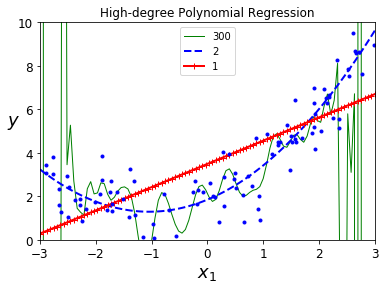

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([("poly_features", poly_features),
                               ("std_scaler", std_scaler),
                               ("lin_reg", lin_reg)])
    polynomial_reg.fit(X, y)
    y_poly_reg = polynomial_reg.predict(X_new)
    plt.plot(X_new, y_poly_reg, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper center")
plt.title("High-degree Polynomial Regression")
plt.show()

Plot learning curves of a model given some trainin set:

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="best", fontsize=14)
    plt.xlabel("Training set size", fontsize=16)
    plt.ylabel("RMSE", fontsize=16)

Look at the learning curves of the plain Linear Regression model (a straight line):

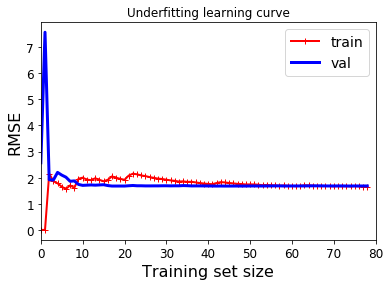

In [44]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlim([0, 80])
plt.title("Underfitting learning curve")
plt.show()

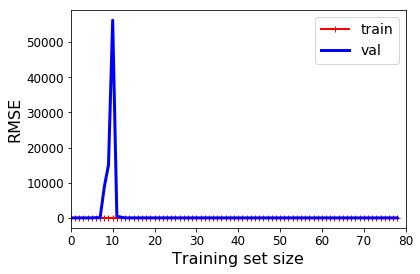

In [45]:
polynomial_reg = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", lin_reg)
])

plot_learning_curves(polynomial_reg, X, y)
plt.xlim([0, 80])
plt.show()

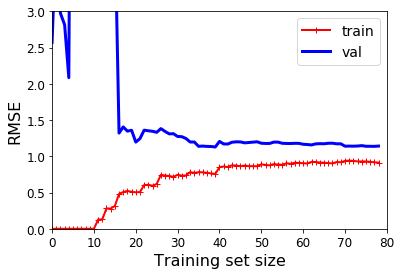

In [46]:
polynomial_reg = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", lin_reg)
])

plot_learning_curves(polynomial_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

## 5 Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

For a linear model, regularization is typically achieved by constraining the weights of the model.

### Ridge Regression (Tikhonov regularization)

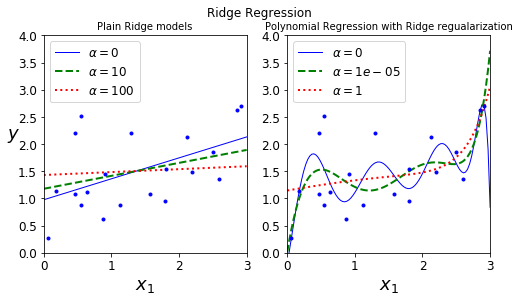

In [47]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(
            alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(
                    degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw,
                 label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.title("Plain Ridge models", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Polynomial Regression with Ridge regualarization", fontsize=10)
plt.suptitle("Ridge Regression")

plt.show()

In [48]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

using SGD:

In [49]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=5)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.12795912])

### Lasso Regression

Lasso Regresssion, also called Least Absolute Shrinkage and Selection Operator Regression, adds a regularization term to the cost func, but it uses the L1 norm of the weight vector instead of half the square of the L2 norm.

C:\Users\libin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


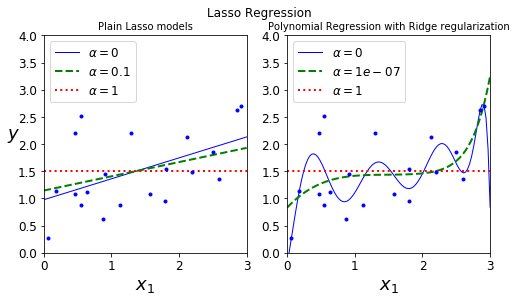

In [50]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.title("Plain Lasso models", fontsize=10)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.title("Polynomial Regression with Ridge regularization", fontsize=10)
plt.suptitle("Lasso Regression")

plt.show()

In [51]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [52]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=5)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.11802099])

### Elastic Net

Elatic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simle mix of both Ridge and Lasso's regularization terms, and we can contorl the mix ratio.

In [53]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called **early stopping**.

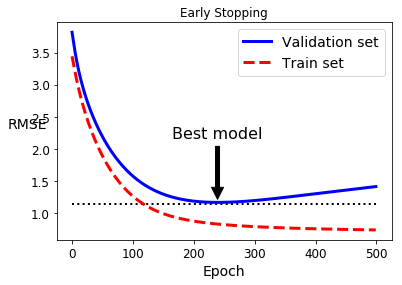

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, penalty=None, eta0=0.0005, warm_start=True,
                       learning_rate="constant", random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
             )
best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=3, label="Train set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14, rotation=0)
plt.title("Early Stopping")

plt.show()

A basic implementation of early stopping:

In [55]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, eta0=0.0005,
                       learning_rate="constant", random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_pred)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [56]:
best_epoch

239

In [57]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=True)

## 6 Logistic Regression

Logit Regression / Maximum-Entropy classification / log-linear classifier

Logistic Regression is used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, label "1"), or else it predicts that it does not (i.e., it belongs to the negative class, labeled "0"). This makes it a binary classifier.

**Logistic function**
$$\sigma(t)=\frac{1}{1+exp(-t)}$$

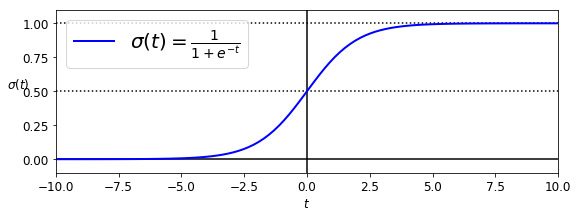

In [58]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1., 1.], "k:")
plt.plot([0, 0], [-0.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t)=\frac{1}{1+e^{-t}}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$\sigma(t)$", fontsize=12, rotation=0)
plt.legend(loc="best", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Try tot build a classifier to detect the Iris-Virginica type based only on the petal width feature.

+ Load the data

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [60]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [62]:
iris.data.shape

(150, 4)

In [63]:
X = iris.data[:, 3]
X.shape

(150,)

petal width

In [64]:
X = iris.data[:, 3:]
X.shape

(150, 1)

In [65]:
y = (iris.target == 2).astype(np.int)  # 1 if Iris-Virginica else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

+ Train a Logistic Regression model:

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
log_reg.coef_

array([[2.61727777]])

In [68]:
log_reg.classes_

array([0, 1])

In [69]:
log_reg.intercept_

array([-4.2209364])

+ Look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm.

Returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.

In [70]:
X_new = np.linspace(0, 3, 100).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.98552764, 0.01447236],
       [0.98435176, 0.01564824],
       [0.98308199, 0.01691801],
       [0.98171109, 0.01828891],
       [0.98023134, 0.01976866],
       [0.97863447, 0.02136553],
       [0.97691164, 0.02308836],
       [0.97505344, 0.02494656],
       [0.97304981, 0.02695019],
       [0.97089006, 0.02910994],
       [0.96856282, 0.03143718],
       [0.96605603, 0.03394397],
       [0.96335691, 0.03664309],
       [0.96045195, 0.03954805],
       [0.9573269 , 0.0426731 ],
       [0.95396674, 0.04603326],
       [0.95035572, 0.04964428],
       [0.94647733, 0.05352267],
       [0.94231434, 0.05768566],
       [0.93784882, 0.06215118],
       [0.93306216, 0.06693784],
       [0.92793519, 0.07206481],
       [0.92244816, 0.07755184],
       [0.91658091, 0.08341909],
       [0.91031292, 0.08968708],
       [0.90362348, 0.09637652],
       [0.89649184, 0.10350816],
       [0.88889736, 0.11110264],
       [0.88081974, 0.11918026],
       [0.87223925, 0.12776075],
       [0.

> 第一列表示Not Iris-Virginica，第二列表示Iris-Virginica

In [71]:
y_pred = log_reg.predict(X_new)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

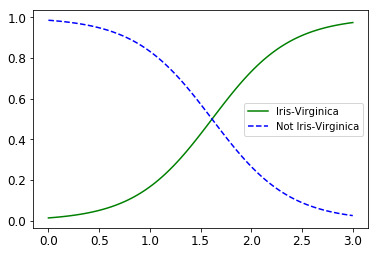

In [72]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="best", fontsize=10)

In [73]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.61561562])

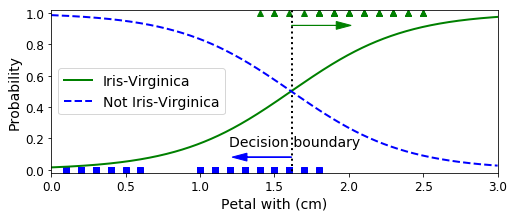

In [74]:
plt.figure(figsize=(8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal with (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [75]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

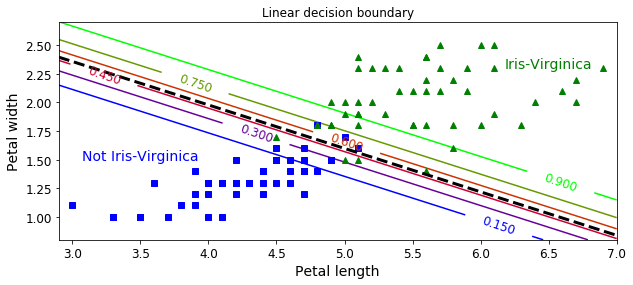

In [76]:
X = iris.data[:, [2, 3]]  # petal length, petal width
y = (iris.target == 2).astype(np.int)

log_reg = LogisticRegression(C=10 * 10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right +
             log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.title("Linear decision boundary")
plt.show()

<a list of 6 text.Text objects>

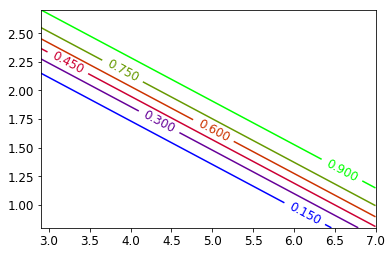

In [77]:
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiplt binary classifiers. This is called **Softmax Regression**, or **Multinomial Logistic Regression**.

In [78]:
X = iris.data[:, [2, 3]]  # petal length, petal width
y = iris.target

In [79]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="sag", C=10,
                                 max_iter=5000, random_state=42)
softmax_reg.fit(X, y)
softmax_reg.predict_proba([[5, 2]])

array([[8.13185036e-07, 6.27257530e-02, 9.37273434e-01]])

In [81]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10,
                                 random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
softmax_reg.predict([[5, 2]])

array([2])

In [83]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

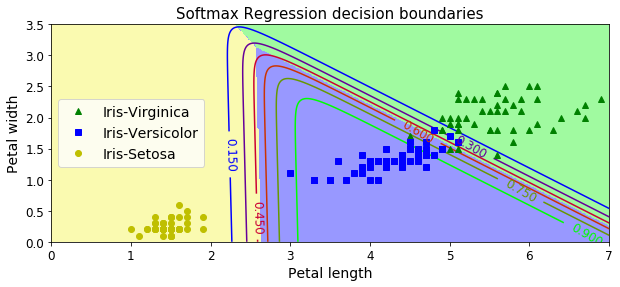

In [84]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("Softmax Regression decision boundaries", fontsize=15)
plt.show()